# MS/MS Analysis of Celecoxib

In [54]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import venn
import matplotlib.pyplot as plt

#### Venn Diagram colors

In [12]:
default_colors = [
    # r, g, b, a
    [92, 192, 98, 0.5],
    [90, 155, 212, 0.5],
    [246, 236, 86, 0.6],
    [241, 90, 96, 0.4],
    [255, 117, 0, 0.3],
    [82, 82, 190, 0.2],
]
default_colors = [
    [i[0] / 255.0, i[1] / 255.0, i[2] / 255.0, i[3]]
    for i in default_colors
]

### Initialize variables

In [43]:
parentDTXSID = 'DTXSID0022777'
parentSMILES = r'CC1=CC=C(C=C1)C2=CC(=NN2C3=CC=C(C=C3)S(=O)(=O)N)C(F)(F)F'
parentINCHIKEY = Chem.MolToInchiKey(Chem.MolFromSmiles(parentSMILES))
root_dir = r'L:\Lab\NCCT_ExpoCast\ExpoCast2020\SSA-Metabolism\CaseStudy\Celecoxib_CaseStudy'
MSMS_results = pd.read_csv(root_dir + r'\CFMID_Merged\MergedCFMIDResults.csv')

### Generate Identification DataFrame

In [14]:
identificationDF = pd.DataFrame(columns = ['Feature_Mass', 'Identifier', 'Identifier_Level', 'InChIKey' ,'Confidence', 'Formula_Score', 'MSMS_Score'])

### Predicted/Reported Metabolites list

In [15]:
aggregatedMetabolites = pd.read_csv(r'L:\Lab\NCCT_ExpoCast\ExpoCast2020\SSA-Metabolism\CaseStudy\metabolite_masterList.csv')

In [16]:
aggregatedMetabolites = aggregatedMetabolites[aggregatedMetabolites['Parent_DTXSID'] == parentDTXSID]
aggregatedMetabolites['INCHIKEY'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in aggregatedMetabolites['SMILES']]
aggregatedMetabolites

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,INCHIKEY
107,DTXSID0022777,NaN,Cc1ccc(-c2cc(C(F)(F)F)n[nH]2)cc1,C11H9F3N2,226.071783,False,True,0,0,1,1,0,NQEFIPVOJGJVRG-UHFFFAOYSA-N
108,DTXSID0022777,NaN,O=Cc1ccc(-c2cc(C(F)(F)F)n[nH]2)cc1,C11H7F3N2O,240.051048,False,True,0,0,1,0,0,GHVAKAILVHMYPO-UHFFFAOYSA-N
109,DTXSID0022777,NaN,NS(=O)(=O)c1ccc(O)cc1,C6H7NO3S,173.014664,False,True,0,0,1,1,0,DIRCLGLKRZLKHG-UHFFFAOYSA-N
110,DTXSID0022777,NaN,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(C=O)c...,C17H12F3N3O3S,395.055147,False,True,1,0,1,1,0,DUBHJZUGZBQQGF-UHFFFAOYSA-N
111,DTXSID0022777,DTXSID60432707,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(CO)cc...,C17H14F3N3O3S,397.070797,False,True,1,1,1,1,1,ICRSYPPLGADZKA-UHFFFAOYSA-N
112,DTXSID0022777,DTXSID40434744,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(C(=O)...,C17H12F3N3O4S,411.050062,False,True,0,1,1,1,1,WTHNOVFEXONZMI-UHFFFAOYSA-N
113,DTXSID0022777,NaN,OCc1ccc(-c2cc(C(F)(F)F)n[nH]2)cc1,C11H9F3N2O,242.066698,False,True,0,0,1,0,0,KEUAWBJETQYUQA-UHFFFAOYSA-N
114,DTXSID0022777,NaN,Cc1ccc(-c2cc(C(F)(F)F)n[nH]2)c(O)c1,C11H9F3N2O,242.066698,False,True,0,0,1,0,0,RSVJTRFTJFWQTR-UHFFFAOYSA-N
115,DTXSID0022777,NaN,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,C17H14F3N3O3S,397.070797,False,True,1,0,1,0,0,MGUKBYXVNDLSKG-UHFFFAOYSA-N
116,DTXSID0022777,NaN,Cc1ccc(-c2cc(C(F)(F)F)n[nH]2)cc1O,C11H9F3N2O,242.066698,False,True,0,0,1,0,0,NMDGQSKOHIWPHH-UHFFFAOYSA-N


### CFMID Identifications

In [17]:
MSMS_results

,MASS,DTXCID,FORMULA,SMILES,Feature_MASS,energy_sum_MEDIAN,quotient_SCORE
0,120.04226,DTXCID201391507,C4H8O4,OOC1COCCO1,120.0429,0.000778,0.001194
1,120.04360,DTXCID10241548,C5H4N4,C1=NN=C2C=NC=CN12,120.0429,0.069879,0.107195
2,120.04360,DTXCID30115434,C5H4N4,C1=NN2C=CN=CC2=N1,120.0429,0.075784,0.116253
3,120.04360,DTXCID80291434,C5H4N4,C1=C2C=NC=CN2N=N1,120.0429,0.088966,0.136475
4,120.04360,DTXCID50347654,C5H4N4,NC1=NC=C(C=N1)C#N,120.0429,0.081150,0.124485
...,...,...,...,...,...,...,...
1011,528.45425,DTXCID901492643,C35H60O3,CCCCCCCCCCCCCCCCCCOC(=O)C=CC1=CC(=C(O)C(=C1)C(...,528.4559,0.121872,0.950283
1012,528.45425,DTXCID101458536,C35H60O3,CCCCCCCCCCCCCCCC(=O)OC1CCC2(C)C(CCC3C4CCC(=O)C...,528.4559,0.002311,0.018023
1013,528.45425,DTXCID40884442,C35H60O3,CCCCCCCOC(=O)OC1CCC2(C)C3CCC4(C)C(CCC4C3CC=C2C...,528.4559,0.000895,0.006981
1014,528.45425,DTXCID90284751,C35H60O3,CCCCCCCCCCCCCCCCCCCCCCCCCCOC(=O)C=CC1=CC=C(O)C=C1,528.4559,0.000352,0.002747


In [18]:
print('Num features in MSMS data: ' + str(len(MSMS_results['Feature_MASS'].unique())))

Num features in MSMS data: 13


In [19]:
sum(MSMS_results['FORMULA'].apply(lambda x: 'C17H14' in x))

5

## Match MSMS predictions against known/predicted metabolites

In [20]:
MSMS_results['InchiKey'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in MSMS_results['SMILES']]
MSMS_results.drop_duplicates(subset = 'InchiKey', inplace = True)
MSMS_results['Predicted'] = [True if x in aggregatedMetabolites['INCHIKEY'].values else False for x in MSMS_results['InchiKey']]

In [21]:
predictedSubset = MSMS_results[MSMS_results['Predicted'] == True]
predictedSubset

,MASS,DTXCID,FORMULA,SMILES,Feature_MASS,energy_sum_MEDIAN,quotient_SCORE,InchiKey,Predicted
978,381.07588,DTXCID502777,C17H14F3N3O2S,CC1=CC=C(C=C1)C1=CC(=NN1C1=CC=C(C=C1)S(N)(=O)=...,381.0763,1.006532,0.737314,RZEKVGVHFLEQIL-UHFFFAOYSA-N,True


In [22]:
for idx, compound in predictedSubset.iterrows():
    rowDF = pd.DataFrame(data = {'Feature_Mass' : compound['Feature_MASS'],
                                 'Identifier': compound['SMILES'],
                                 'Identifier_Level' : 'Structure - MS2',
                                 'InChIKey' : Chem.MolToInchiKey(Chem.MolFromSmiles(compound['SMILES'])),
                                 'Confidence' : '2b',
                                 'Formula_Score' : None,
                                 'MSMS_Score' : compound['quotient_SCORE']}, index=[idx])
    identificationDF = identificationDF.append(rowDF)

In [23]:
identificationDF

,Feature_Mass,Identifier,Identifier_Level,InChIKey,Confidence,Formula_Score,MSMS_Score
978,381.0763,CC1=CC=C(C=C1)C1=CC(=NN1C1=CC=C(C=C1)S(N)(=O)=...,Structure - MS2,RZEKVGVHFLEQIL-UHFFFAOYSA-N,2b,None,0.737314


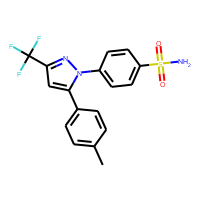

In [24]:
mols = []
for featureMass in predictedSubset['Feature_MASS'].unique():
    rows = predictedSubset[predictedSubset['Feature_MASS'] == featureMass]
    mols = mols + [Chem.MolFromSmiles(x) for x in rows['SMILES']]
img = Draw.MolsToGridImage(mols, molsPerRow=len(mols), subImgSize=(200,200))
display(img)

In [25]:
for chem in predictedSubset['SMILES']:
    Draw.MolToFile(Chem.MolFromSmiles(chem), root_dir + '\Figures\MOLImage' +chem+ '.png')

## Find structures missed by CFMID but matched between predictions/reported and MS labeling

In [26]:
featureList = pd.read_csv(root_dir + '\Filtered_features\FeatureList_subset.csv')
#Clean naming of formula
featureList['Formula'] = featureList['Formula'].apply(lambda x: x.rsplit('Esi')[0] if 'Esi' in x else x.rsplit('_mfg')[0] if '_mfg' in x else x)
#Remove features that have a formula already identified in predictedSubset
featureList = featureList[~featureList['Formula'].isin(predictedSubset['FORMULA'])]

In [27]:
featureList

,index,Feature_ID,Formula,Score,Mass,Retention_Time,BlankG00,BlankG01,BlankG02,Gluc00,...,Super42,BlankSub_Median_Super4,BlankSub_Max_Median_ALLSamples_Super4,Has_Adduct_or_Loss,Is_Adduct_or_Loss,Adduct_or_Loss_Info,Annotation_Source,Formula_Clean,KMeans,orderCat
1,252,470,C17H12F3N3O4S,90.32,411.0510,6.654000,NaN,NaN,NaN,NaN,...,1943439.0,1943439.0,1943439.0,1,0,499(Na);499(Na);499(Na);499(Na);499(Na);499(Na...,Suspect,C17H12F3N3O4S,6,1
2,6,252,C10H14N4O5,93.15,270.0966,0.898000,NaN,NaN,NaN,132302.0,...,563308.0,578841.0,578841.0,0,0,NaN,MFG,C10H14N4O5,6,3
3,290,580,C13H34N6O9S3,94.16,514.1540,0.931000,NaN,NaN,NaN,NaN,...,144670.0,144670.0,144670.0,0,0,NaN,MFG,C13H34N6O9S3,6,3
4,499,1142,C19H11N2O9,82.40,411.0458,6.649997,NaN,NaN,NaN,NaN,...,371413.0,371413.0,371413.0,0,0,NaN,MFG,C19H11N2O9,6,3
5,500,1089,C20H19N6,81.82,343.1661,1.401001,NaN,NaN,NaN,NaN,...,971869.0,986476.0,986476.0,0,0,NaN,MFG,C20H19N6,6,3
6,508,1239,C28H58N9O2,72.42,552.4691,11.294004,NaN,NaN,NaN,NaN,...,406188.0,406188.0,406188.0,0,0,NaN,MFG,C28H58N9O2,6,3
7,530,1498,C59H97N9,96.64,931.7863,10.807005,NaN,NaN,NaN,NaN,...,156364.0,240151.0,240151.0,0,0,NaN,MFG,C59H97N9,6,3
8,220,981,C8H9NO4,85.23,183.0535,2.845001,NaN,NaN,NaN,732741.0,...,2982054.0,2982054.0,2982054.0,0,0,NaN,MFG,C8H9NO4,6,3


In [28]:
allSus = pd.read_csv('L:\\Lab\\NCCT_ExpoCast\\ExpoCast2020\\SSA-Metabolism\\CaseStudy\\metabolite_masterList.csv')
allSus = allSus.fillna('None')
allSus = allSus[allSus['Parent_DTXSID'] == parentDTXSID]
allSus['Metabolite_INCHIKEY'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in allSus['SMILES']]

In [29]:
allSus

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,Metabolite_INCHIKEY
107,DTXSID0022777,None,Cc1ccc(-c2cc(C(F)(F)F)n[nH]2)cc1,C11H9F3N2,226.071783,False,True,0,0,1,1,0,NQEFIPVOJGJVRG-UHFFFAOYSA-N
108,DTXSID0022777,None,O=Cc1ccc(-c2cc(C(F)(F)F)n[nH]2)cc1,C11H7F3N2O,240.051048,False,True,0,0,1,0,0,GHVAKAILVHMYPO-UHFFFAOYSA-N
109,DTXSID0022777,None,NS(=O)(=O)c1ccc(O)cc1,C6H7NO3S,173.014664,False,True,0,0,1,1,0,DIRCLGLKRZLKHG-UHFFFAOYSA-N
110,DTXSID0022777,None,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(C=O)c...,C17H12F3N3O3S,395.055147,False,True,1,0,1,1,0,DUBHJZUGZBQQGF-UHFFFAOYSA-N
111,DTXSID0022777,DTXSID60432707,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(CO)cc...,C17H14F3N3O3S,397.070797,False,True,1,1,1,1,1,ICRSYPPLGADZKA-UHFFFAOYSA-N
112,DTXSID0022777,DTXSID40434744,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(C(=O)...,C17H12F3N3O4S,411.050062,False,True,0,1,1,1,1,WTHNOVFEXONZMI-UHFFFAOYSA-N
113,DTXSID0022777,None,OCc1ccc(-c2cc(C(F)(F)F)n[nH]2)cc1,C11H9F3N2O,242.066698,False,True,0,0,1,0,0,KEUAWBJETQYUQA-UHFFFAOYSA-N
114,DTXSID0022777,None,Cc1ccc(-c2cc(C(F)(F)F)n[nH]2)c(O)c1,C11H9F3N2O,242.066698,False,True,0,0,1,0,0,RSVJTRFTJFWQTR-UHFFFAOYSA-N
115,DTXSID0022777,None,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,C17H14F3N3O3S,397.070797,False,True,1,0,1,0,0,MGUKBYXVNDLSKG-UHFFFAOYSA-N
116,DTXSID0022777,None,Cc1ccc(-c2cc(C(F)(F)F)n[nH]2)cc1O,C11H9F3N2O,242.066698,False,True,0,0,1,0,0,NMDGQSKOHIWPHH-UHFFFAOYSA-N


In [30]:
for idx, compound in featureList.iterrows():
    formulaFilter = allSus['Formula'].str.contains(compound['Formula'])
    if sum(formulaFilter) == 1:
        tmpDF = pd.DataFrame(data = {'Feature_Mass': compound['Mass'],
                                 'Identifier': allSus.loc[formulaFilter, 'SMILES'].values[0],
                                 'Identifier_Level' : 'Structure - MS1',
                                 'InChIKey' : allSus.loc[formulaFilter, 'Metabolite_INCHIKEY'].values[0],
                                 'Confidence' : '3',
                                 'Formula_Score' : compound['Score'],
                                 'MSMS_Score' : None}, index=[idx])
        identificationDF = identificationDF.append(tmpDF)
    elif sum(formulaFilter) == 0:
        tmpDF = pd.DataFrame(data = {'Feature_Mass': compound['Mass'],
                                 'Identifier': compound['Formula'],
                                 'Identifier_Level' : 'Formula',
                                 'InChIKey' :  None,
                                 'Confidence' : '4',
                                 'Formula_Score' : compound['Score'],
                                 'MSMS_Score' : None}, index=[idx])
        
        identificationDF = identificationDF.append(tmpDF)

In [31]:
identificationDF.sort_values(by = 'Confidence')

,Feature_Mass,Identifier,Identifier_Level,InChIKey,Confidence,Formula_Score,MSMS_Score
978,381.0763,CC1=CC=C(C=C1)C1=CC(=NN1C1=CC=C(C=C1)S(N)(=O)=...,Structure - MS2,RZEKVGVHFLEQIL-UHFFFAOYSA-N,2b,NaN,0.737314
1,411.0510,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(C(=O)...,Structure - MS1,WTHNOVFEXONZMI-UHFFFAOYSA-N,3,90.32,None
2,270.0966,C10H14N4O5,Formula,None,4,93.15,None
3,514.1540,C13H34N6O9S3,Formula,None,4,94.16,None
4,411.0458,C19H11N2O9,Formula,None,4,82.40,None
5,343.1661,C20H19N6,Formula,None,4,81.82,None
6,552.4691,C28H58N9O2,Formula,None,4,72.42,None
7,931.7863,C59H97N9,Formula,None,4,96.64,None
8,183.0535,C8H9NO4,Formula,None,4,85.23,None


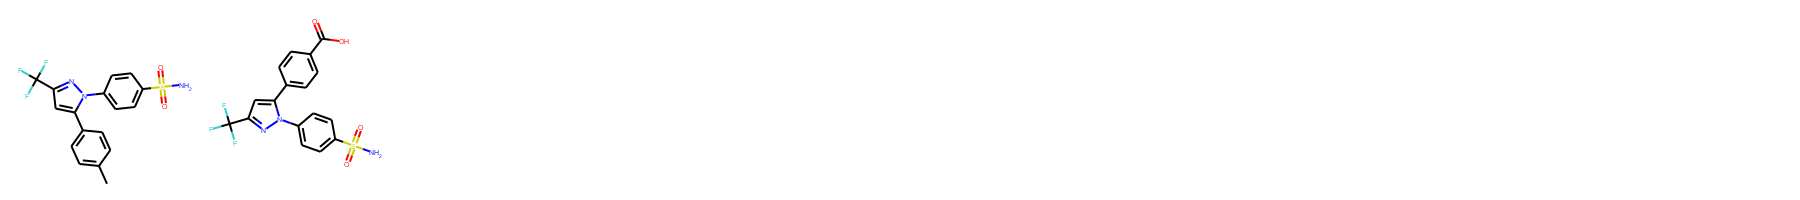

In [32]:
mols = []
for identifier in identificationDF['Identifier'].unique():
    try:
        mols = mols +  [Chem.MolFromSmiles(identifier)]
    except:
        continue        
img = Draw.MolsToGridImage(mols, molsPerRow=len(mols), subImgSize=(200,200))
display(img)

In [33]:
matchedDF = allSus[(allSus['Metabolite_INCHIKEY'].isin(identificationDF['InChIKey'])) | (allSus['Reported'] == 1)]
matchedDF

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,Metabolite_INCHIKEY
111,DTXSID0022777,DTXSID60432707,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(CO)cc...,C17H14F3N3O3S,397.070797,False,True,1,1,1,1,1,ICRSYPPLGADZKA-UHFFFAOYSA-N
112,DTXSID0022777,DTXSID40434744,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(C(=O)...,C17H12F3N3O4S,411.050062,False,True,0,1,1,1,1,WTHNOVFEXONZMI-UHFFFAOYSA-N
149,DTXSID0022777,DTXSID0022777,CC1=CC=C(C=C1)C1=CC(=NN1C1=CC=C(C=C1)S(N)(=O)=...,C17H14F3N3O2S,381.075882,False,False,0,0,0,0,1,RZEKVGVHFLEQIL-UHFFFAOYSA-N
150,DTXSID0022777,DTXSID10439488,NS(=O)(=O)C1=CC=C(C=C1)N1N=C(C=C1C1=CC=C(C=C1)...,C23H20F3N3O10S,587.082150,False,False,0,0,0,0,1,ZSTBSABHKHAHNU-QUXXCFOZSA-N


In [34]:
modelList = ['ToolBox', 'Meteor', 'BioTransformer', 'TIMES', 'Reported']

aggGroup = allSus[allSus['Parent_DTXSID'].isin(['DTXSID4034150'])]
performanceMap = pd.DataFrame(data = None, columns=['Model','Total','Unique','NTA_Match_Count'])
performanceMap['Model'] = modelList
performanceMap['Total'] = list(allSus[modelList].sum(axis=0))
performanceMap['Unique'] = [sum((allSus[match] == 1.0) & (allSus[modelList].sum(axis = 1) == 1)) for match in modelList]
performanceMap['NTA_Match_Count'] = [sum(allSus.loc[allSus[match] == 1,'Metabolite_INCHIKEY'].isin(identificationDF['InChIKey'])) for match in modelList]


In [35]:
performanceMap

,Model,Total,Unique,NTA_Match_Count
0,ToolBox,11,4,1
1,Meteor,3,1,1
2,BioTransformer,18,14,0
3,TIMES,8,3,1
4,Reported,4,2,2


In [36]:
allSus

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,Metabolite_INCHIKEY
107,DTXSID0022777,None,Cc1ccc(-c2cc(C(F)(F)F)n[nH]2)cc1,C11H9F3N2,226.071783,False,True,0,0,1,1,0,NQEFIPVOJGJVRG-UHFFFAOYSA-N
108,DTXSID0022777,None,O=Cc1ccc(-c2cc(C(F)(F)F)n[nH]2)cc1,C11H7F3N2O,240.051048,False,True,0,0,1,0,0,GHVAKAILVHMYPO-UHFFFAOYSA-N
109,DTXSID0022777,None,NS(=O)(=O)c1ccc(O)cc1,C6H7NO3S,173.014664,False,True,0,0,1,1,0,DIRCLGLKRZLKHG-UHFFFAOYSA-N
110,DTXSID0022777,None,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(C=O)c...,C17H12F3N3O3S,395.055147,False,True,1,0,1,1,0,DUBHJZUGZBQQGF-UHFFFAOYSA-N
111,DTXSID0022777,DTXSID60432707,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(CO)cc...,C17H14F3N3O3S,397.070797,False,True,1,1,1,1,1,ICRSYPPLGADZKA-UHFFFAOYSA-N
112,DTXSID0022777,DTXSID40434744,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(C(=O)...,C17H12F3N3O4S,411.050062,False,True,0,1,1,1,1,WTHNOVFEXONZMI-UHFFFAOYSA-N
113,DTXSID0022777,None,OCc1ccc(-c2cc(C(F)(F)F)n[nH]2)cc1,C11H9F3N2O,242.066698,False,True,0,0,1,0,0,KEUAWBJETQYUQA-UHFFFAOYSA-N
114,DTXSID0022777,None,Cc1ccc(-c2cc(C(F)(F)F)n[nH]2)c(O)c1,C11H9F3N2O,242.066698,False,True,0,0,1,0,0,RSVJTRFTJFWQTR-UHFFFAOYSA-N
115,DTXSID0022777,None,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,C17H14F3N3O3S,397.070797,False,True,1,0,1,0,0,MGUKBYXVNDLSKG-UHFFFAOYSA-N
116,DTXSID0022777,None,Cc1ccc(-c2cc(C(F)(F)F)n[nH]2)cc1O,C11H9F3N2O,242.066698,False,True,0,0,1,0,0,NMDGQSKOHIWPHH-UHFFFAOYSA-N


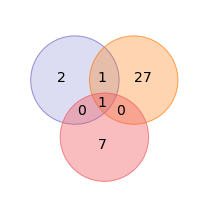

In [57]:
bt_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['BioTransformer'] > 0])
meteor_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['Meteor'] > 0])
times_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['TIMES'] > 0])
tb_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['ToolBox'] > 0])

silico_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if (row['ToolBox'] > 0 or row['BioTransformer'] > 0 or row['Meteor'] > 0 or row['TIMES'] > 0)])
lit_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['Reported'] > 0])
vitro_venn = set([row['InChIKey'] if row['Identifier_Level'] != 'Formula' else row['Identifier'] for idx, row in identificationDF.iterrows() if row['InChIKey'] != parentINCHIKEY]) 

labels = venn.get_labels([lit_venn, silico_venn, vitro_venn])
fig, ax = venn.venn4(labels, names=['Reported', 'Predicted', 'Measured'], colors = [default_colors[-1], default_colors[-2],default_colors[-3]], figsize = (3,3))
ax.get_legend().remove()
comp = 'Celecoxib'
plt.tight_layout()
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\\'+comp+r'_GenOverlap.tiff', dpi = 300)

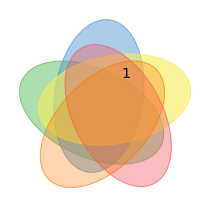

In [58]:
#Find overlapping metabolites 
bt_union = bt_venn.intersection(vitro_venn)
meteor_union = meteor_venn.intersection(vitro_venn)
times_union = times_venn.intersection(vitro_venn)
tb_union = tb_venn.intersection(vitro_venn)
lit_union = lit_venn.intersection(vitro_venn)

labels = venn.get_labels([bt_union, meteor_union, times_union, tb_union, lit_union],fill=['number'])
for k in labels:
    if labels[k] == '0 ':
        labels.update({k : ''})
fig, ax = venn.venn5(labels, names=['BioTransformer', 'Meteor', 'TIMES', 'Toolbox', 'Reported'], figsize = (3,3))
ax.get_legend().remove()
plt.tight_layout()
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\\'+comp+r'_SilicoOverlap.tiff', dpi = 300)